In [2]:
# import necessary libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import researchpy as rp 



In [3]:
# load the data 
data=pd.read_csv('ChronicKidneyDisease.csv')

In [4]:
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
# dtypes 
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [25]:
# info  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [26]:
#check for missing values   
data.isnull().sum() 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [27]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [28]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot','hemo']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,391.0,51.4834,17.1697,0.8683,49.7762,53.1905
1,bp,388.0,76.4691,13.6836,0.6947,75.1033,77.8349
2,sg,353.0,1.0174,0.0057,0.0003,1.0168,1.0180
3,al,354.0,1.0169,1.3527,0.0719,0.8756,1.1583
4,su,351.0,0.4501,1.0992,0.0587,0.3348,0.5655
5,bgr,356.0,148.0365,79.2817,4.2019,139.7727,156.3003
6,bu,381.0,57.4257,50.5030,2.5873,52.3384,62.5130
7,sc,383.0,3.0725,5.7411,0.2934,2.4957,3.6493
8,sod,313.0,137.5288,10.4088,0.5883,136.3711,138.6864
9,pot,312.0,4.6272,3.1939,0.1808,4.2715,4.9830


In [29]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [30]:
cat_cols.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [31]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification']])

,Variable,Outcome,Count,Percent
0,rbc,normal,201,81.05
1,,abnormal,47,18.95
2,pc,normal,259,77.31
3,,abnormal,76,22.69
4,pcc,notpresent,354,89.39
...,...,...,...,...
207,ane,no,339,84.96
208,,yes,60,15.04
209,classification,ckd,248,62.00
210,,notckd,150,37.50


In [34]:
# correlation matrix by using pearson method    
correlation = num_cols.corr(method = 'pearson')   


In [35]:
correlation

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [37]:
# skewness of numerical variables   
num_cols.skew()

id       0.000000
age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
dtype: float64

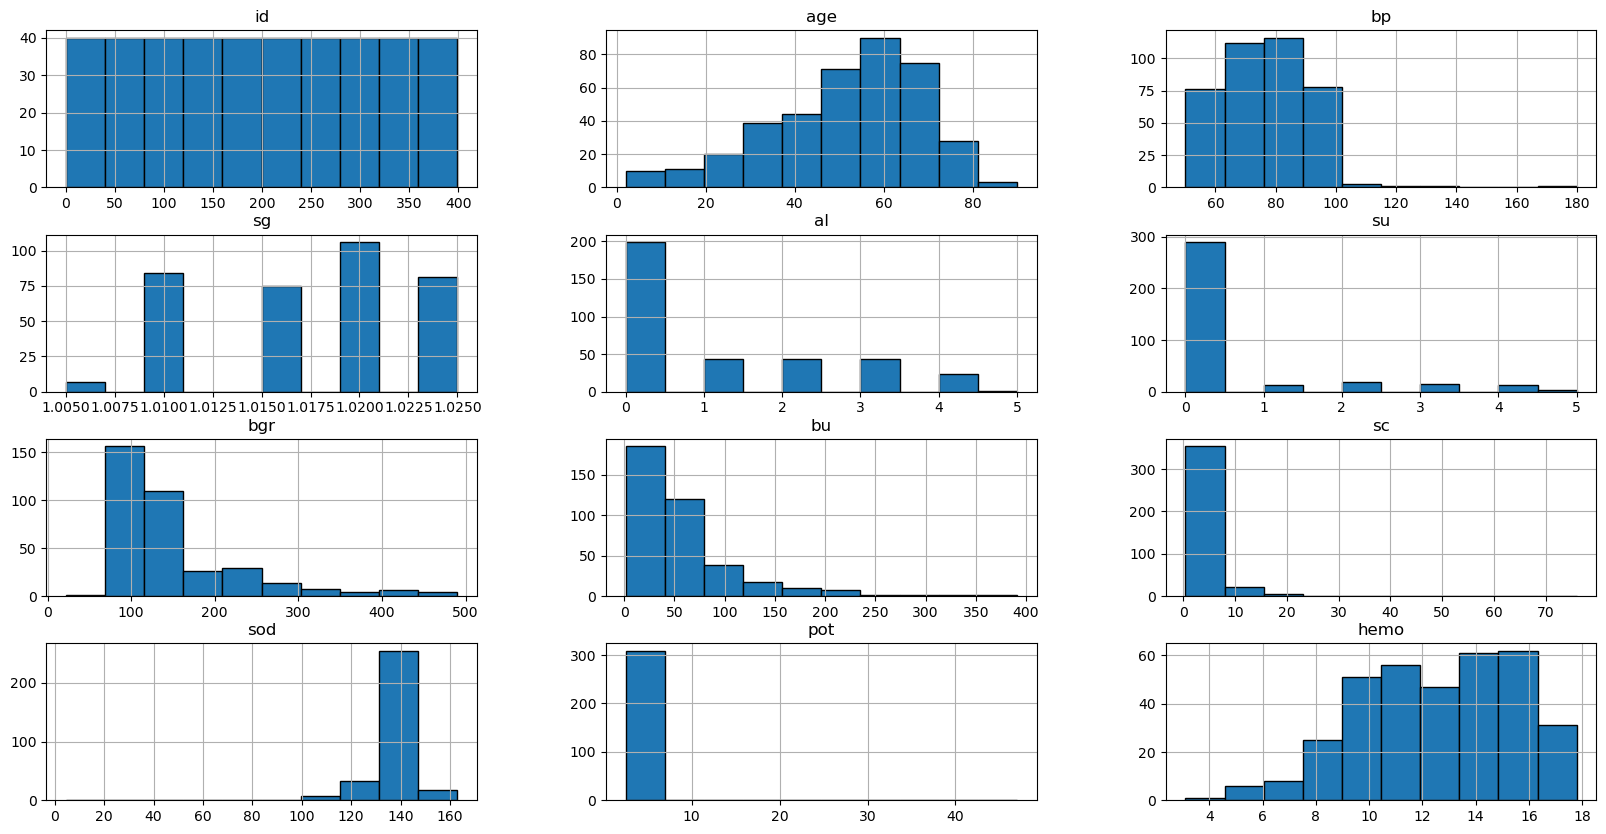

In [38]:
 # Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

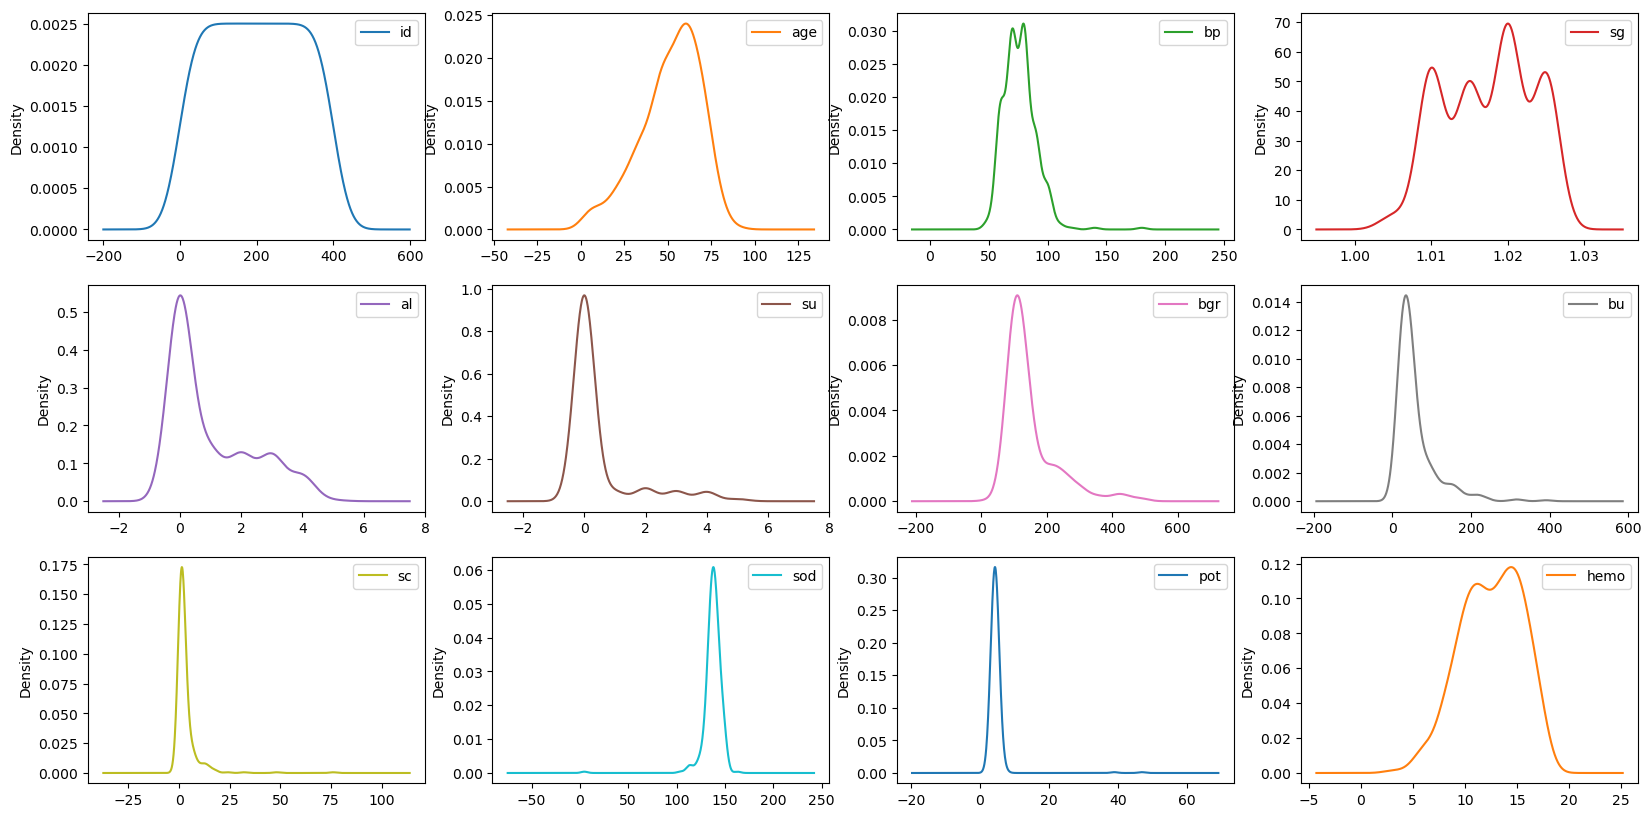

In [39]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

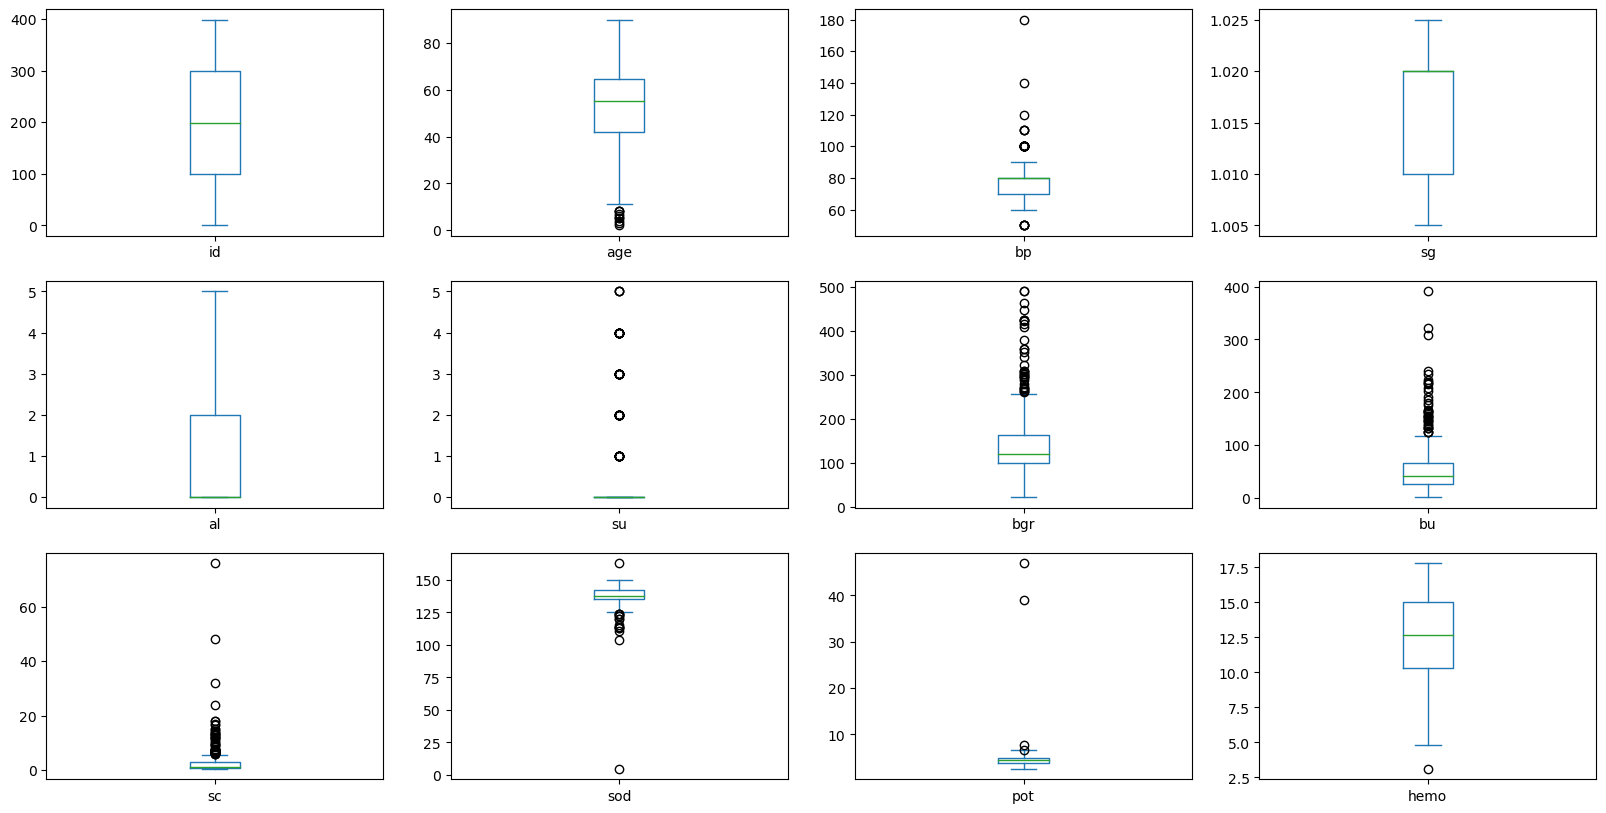

In [40]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show()

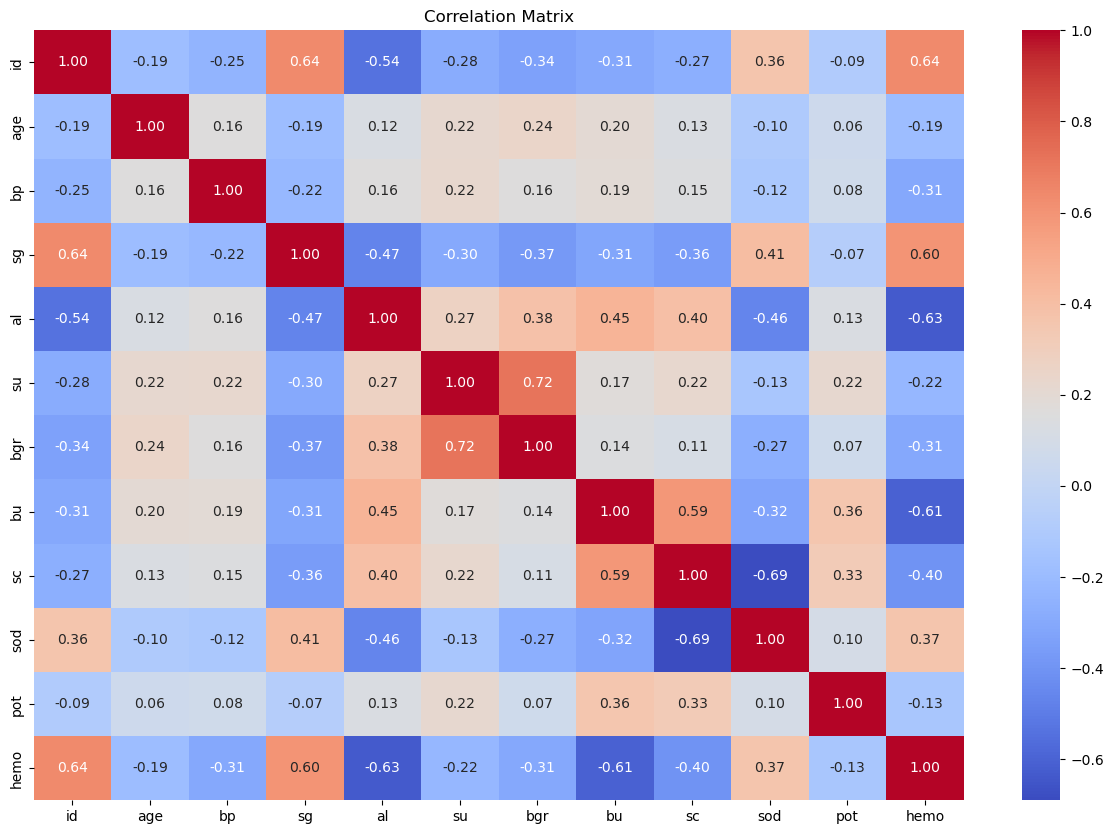

In [42]:
# Multivariate plots with correlations 
plt.figure(figsize=(15,10)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")    
plt.title('Correlation Matrix')
plt.show()


In [43]:
# exmine first few rows of data 
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [49]:
# import pycaret    
from pycaret.classification import *    
setup(data, target = 'classification', session_id = 123, preprocess=True)

,Description,Value
0,Session id,123
1,Target,classification
2,Target type,Multiclass
3,Target mapping,"ckd: 0, ckd : 1, notckd: 2"
4,Original data shape,"(400, 26)"
5,Transformed data shape,"(400, 32)"
6,Transformed train set shape,"(280, 32)"
7,Transformed test set shape,"(120, 32)"
8,Numeric features,12
9,Categorical features,13
